<a href="https://colab.research.google.com/github/Ansh16022004/ML_MODEL/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [ ]:

# Load dataset
file_path = "/content/companies_data.csv"
df = pd.read_csv(file_path)

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 0", "reviews"])

In [ ]:
# Drop rows with missing employee data
df = df.dropna(subset=["employee"])

In [ ]:
# Encode categorical target variable (employee size category)
label_encoder = LabelEncoder()
df["employee"] = label_encoder.fit_transform(df["employee"])

In [ ]:
# Encode categorical features
df["type"] = label_encoder.fit_transform(df["type"])
df["hq"] = label_encoder.fit_transform(df["hq"])

In [ ]:

# Define features and target
X = df[["rating", "type", "hq"]]  # Independent variables
y = df["employee"]  # Target variable

In [ ]:

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:

# Predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20300

    accuracy                           1.00     20300
   macro avg       1.00      1.00      1.00     20300
weighted avg       1.00      1.00      1.00     20300



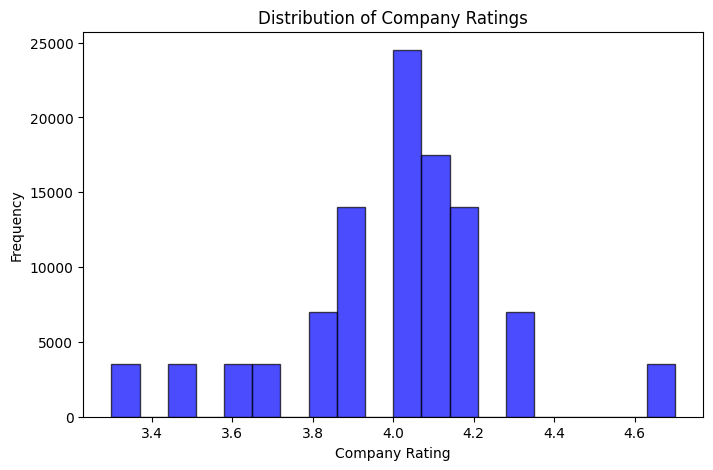

In [ ]:
# Plot histogram of ratings
plt.figure(figsize=(8, 5))
plt.hist(df["rating"], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Company Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Company Ratings")
plt.show()


In [ ]:
def predict_employee_size_value(rating, company_type, hq_location, type_encoder, hq_encoder, employee_encoder, rf_model, df):

    known_hq_locations = hq_encoder.classes_.tolist()

    # Check if the provided HQ location is known, if not, replace with the mode, excluding the problematic value
    if hq_location not in known_hq_locations:
        # Calculate the mode, excluding the problematic 'Mumbai + 114 more' if present
        hq_mode = df["hq"][df["hq"] != "Mumbai + 114 more"].mode()[0] if "Mumbai + 114 more" in df["hq"].values else df["hq"].mode()[0]
        hq_encoded = hq_encoder.transform([hq_mode])[0]  # Transform the mode to encoded value
    else:
        hq_encoded = hq_encoder.transform([hq_location])[0]

    company_type_encoded = type_encoder.transform([company_type])[0] if company_type in type_encoder.classes_ else df["type"].mode()[0]


    input_data = pd.DataFrame([[rating, company_type_encoded, hq_encoded]], columns=["rating", "type", "hq"])

    # Ensure the model supports probability predictions
    if hasattr(rf_model, "predict_proba"):
        prediction = rf_model.predict_proba(input_data)
        return {employee_encoder.inverse_transform([i])[0]: prob for i, prob in enumerate(prediction[0])}
    else:
        return employee_encoder.inverse_transform(rf_model.predict(input_data))[0]

# Example usage
example_prediction = predict_employee_size_value(4.2, "Public", "Mumbai", type_encoder, hq_encoder, employee_encoder, rf_model, df)
print(f"Predicted Employee Size: {example_prediction}")


Predicted Employee Size: {'10000+ employees': 1.0}
